In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

(100, 1)
(100, 1)


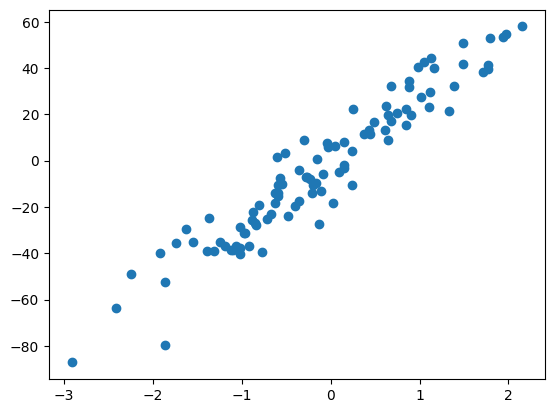

In [2]:
X, Y = make_regression(100, n_features = 1, n_targets = 1, noise = 10, random_state = 3)
Y = Y.reshape((100, 1))
print(X.shape)
print(Y.shape)
plt.scatter(X, Y)

In [3]:
class Network(torch.nn.Module):
    def __init__(self, inSize, outSize):
        super(Network, self).__init__()
        self.l1 = torch.nn.Linear(inSize, outSize)
    def forward(self, x):
        return self.l1(x)

In [4]:
model = Network(1, 1)

torch.Size([100, 1])


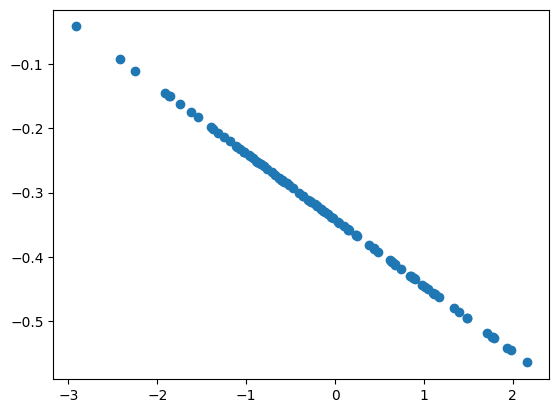

In [6]:
feature = torch.from_numpy(X.astype(np.float32))

print(feature.shape)
out = model(feature).detach().numpy()
plt.scatter(X, out)

In [6]:
class Network(torch.nn.Module):
    def __init__(self, inSize, outSize):
        super(Network, self).__init__()
        self.l1 = torch.nn.Linear(inSize, 5)
        self.relu1 = torch.nn.ReLU()
        self.l2 = torch.nn.Linear(5, 1)
    def forward(self, x):
        out = self.l1(x)
        out = self.relu1(out)
        out = self.l2(out)
        return out

In [7]:
model = Network(1, 1)

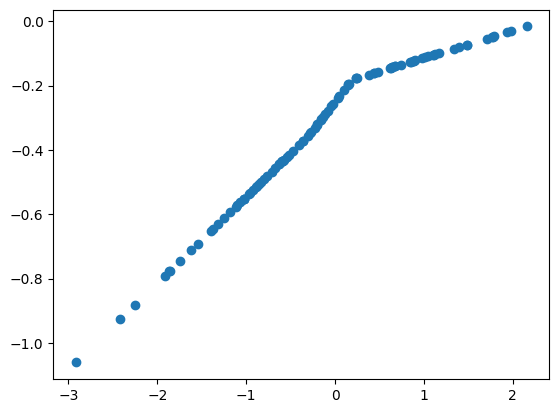

In [8]:
feature = torch.from_numpy(X.astype(np.float32))

out = model(feature).detach().numpy()
plt.scatter(X, out)

In [9]:
learningRate = 0.01

In [15]:
class Network(torch.nn.Module):
    def __init__(self, inSize, outSize):
        super(Network, self).__init__()
        self.l1 = torch.nn.Linear(inSize, 10)
        self.l2 = torch.nn.Linear(10, 1)
    def forward(self, x):
        out = self.l1(x)
        out = self.l2(out)
        return out

930.7224731445312
813.4523315429688
615.6722412109375
309.9317626953125
100.7834701538086
81.9510726928711
80.97779083251953
80.8436050415039
80.82434844970703
80.82144165039062
80.82098388671875
80.82091522216797
80.82090759277344
80.82090759277344
80.82090759277344
80.8208999633789
80.82090759277344
80.82090759277344
80.82090759277344
80.82090759277344
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797
80.82091522216797


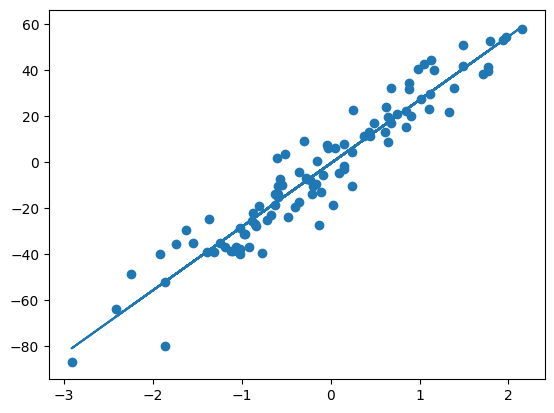

In [16]:
feature = torch.from_numpy(X.astype(np.float32))
target = torch.from_numpy(Y.astype(np.float32))
model = Network(1, 1)
criterion = torch.nn.MSELoss()

for i in range(50):
    prediction = model(feature)
    loss = criterion(prediction, target)
    loss.backward()
    print(loss.item())
    model.l1.weight = torch.nn.Parameter(model.l1.weight - learningRate * model.l1.weight.grad)
    model.l1.bias = torch.nn.Parameter(model.l1.bias - learningRate * model.l1.bias.grad)
    model.l2.weight = torch.nn.Parameter(model.l2.weight - learningRate * model.l2.weight.grad)
    model.l2.bias = torch.nn.Parameter(model.l2.bias - learningRate * model.l2.bias.grad)

prediction = model(feature).detach().numpy()
plt.plot(X, prediction)
plt.scatter(X, Y)

In [17]:
class Network(torch.nn.Module):
    def __init__(self, inSize, outSize):
        super(Network, self).__init__()
        self.l1 = torch.nn.Linear(inSize, 10)
        self.relu1 = torch.nn.ReLU()
        self.l2 = torch.nn.Linear(10, 1)
    def forward(self, x):
        out = self.l1(x)
        out = self.relu1(out)
        out = self.l2(out)
        return out

956.8494262695312
922.89453125
878.09521484375
802.364990234375
685.0321655273438
548.7228393554688
453.2139892578125
406.2460021972656
361.7981262207031
302.6767883300781
231.96385192871094
164.99356079101562
120.46894836425781
101.20353698730469
94.98877716064453
92.62461853027344
91.40715026855469
90.57051849365234
89.92330169677734
89.31348419189453
88.7812728881836
88.36738586425781
88.02493286132812
87.72728729248047
87.43065643310547
87.1725082397461
86.92305755615234
86.67036437988281
86.43635559082031
86.12562561035156
85.86141967773438
85.5992660522461
85.35067749023438
85.111572265625
84.89606475830078
84.72784423828125
84.58203125
84.45877838134766
84.36181640625
84.292236328125
84.22554779052734
84.1612319946289
84.09881591796875
84.02664184570312
83.93745422363281
83.8470230102539
83.73064422607422
83.6268081665039
83.5273666381836
83.43189239501953


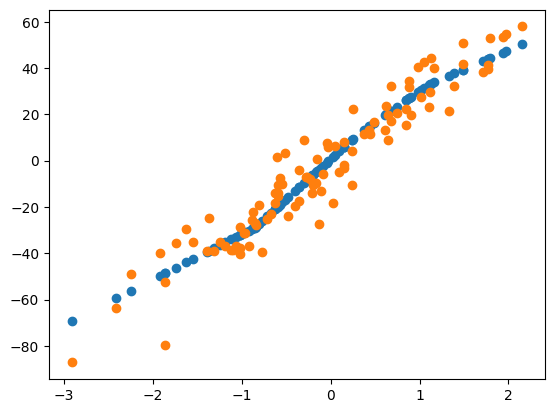

In [20]:
feature = torch.from_numpy(X.astype(np.float32))
target = torch.from_numpy(Y.astype(np.float32))
model = Network(1, 1)
criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)

for i in range(50):
    prediction = model(feature)
    loss = criterion(prediction, target)
    optimizer.zero_grad()
    loss.backward()
    print(loss.item())
    optimizer.step()

prediction = model(feature).detach().numpy()
plt.scatter(X, prediction)
plt.scatter(X, Y)